## Introduction

Linear regression is a basic predictive analytics technique that uses historical data to predict an output variable by assuming a linear connection between the independent and dependent variables. The chart below presents the linear relationship between the output (y) and predictor (X) variables.

#### <a href="#simpleRegression" id="intro">1. Simple Linear Regression</a>
#### <a href="#matrixRegression" id="intro">2. Linear Regression: Matrix form</a>
#### <a href="#gradientDescent" id="intro">3. Gradient Descent</a>
#### <a href="#scikitLearn" id="intro">4. Linear Regression: Scikit Learn</a>

In [1]:
# Import libraries for analysis
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# For visualizations we will use ggplot stlye and Century Gothic as font family
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Century Gothic' 

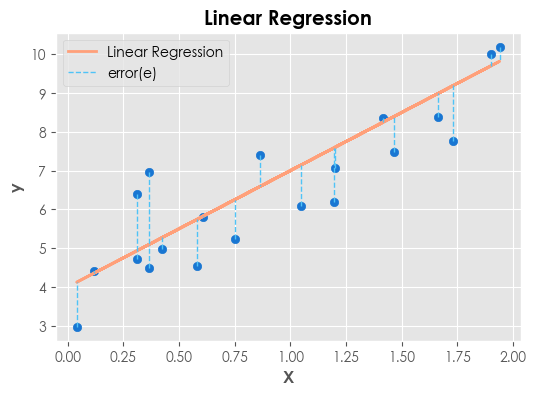

In [3]:
# Linear Regression problem
np.random.seed(42)
x_vector = 2 * np.random.rand(20, 1)
y_vector = 4 + 3 * x_vector + np.random.randn(20, 1)
f_x = 4 + 3 * x_vector
plt.figure(figsize=(6, 4))
plt.plot(x_vector, f_x, linewidth=2, color='#FFA07A', label='Linear Regression')
plt.scatter(x_vector, y_vector, color='#1976D2')
for i in range(len(x_vector)):
    plt.plot([x_vector[i], x_vector[i]], [y_vector[i], f_x[i]], color='#4FC3F7', linestyle='--', linewidth=1, label='error(e)' if i == 0 else '')
plt.title('Linear Regression', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.legend()
plt.show()

## Data processing

In [4]:
# Generate a random function with 100 data points(n). In this case, the range for the 'X' axis will be [0, 2]
# Function y = f(x) = 4 + 3X + error
np.random.seed(42)
n = 100
X = 2 * np.random.rand(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)

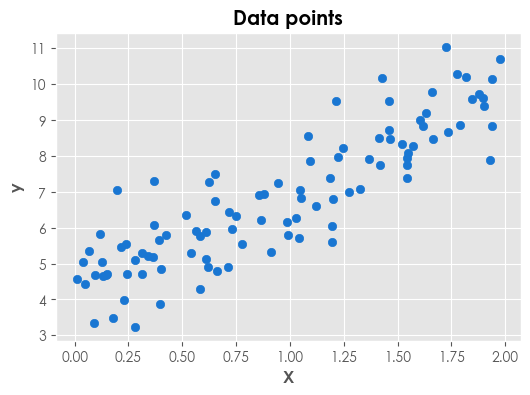

In [5]:
# Lets visualize how it looks
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='#1976D2')
plt.title('Data points', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.show()

## <a id='simpleRegression' href="#intro">1. Simple Linear Regression</a>

A simple linear regression model makes a prediction using an input 'weight' and a constant known as bias or intercept. This is the most simple equation with their coefficients.

### $\hat{y} = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_n X_n$

Our goal is to find the coefficients (parameters) $\theta_0$ & $\theta_1$ that minimize the difference between the target ($y$) and the prediction ($\hat{y}$). This difference is also known as cost function and in regression problems our cost function is the Mean Squared Error (MSE). 

### $MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

By doing some math, we get the following coefficients:

### $\theta_0 = \bar{y} - \theta_1  \bar{X}$

### $\theta_1 = \frac{\sum_{i=1}^{n} (y_i - \bar{y})(X_i - \bar{X})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}$

In [6]:
# According to our coefficients we need to get mean of X and y
y_mean = y.mean()
X_mean = X.mean()

In [7]:
# Calculate coefficients
theta_num = 0
theta_den = 0

for i in range(n):
    theta_num += (y[i] - y_mean) * (X[i] - X_mean)
    theta_den += (X[i] - X_mean)**2
    
theta_1 = theta_num / theta_den
theta_0 = y_mean - theta_1 * X_mean

theta_0 = theta_0[0] 
theta_1 = theta_1[0]

print(f'Coefficients: theta_0: {theta_0:.3f}, theta_1: {theta_1:.3f}')
print(f'Linear Regression equation: y = {theta_0:.3f} + {theta_1:.3f} X')

Coefficients: theta_0: 4.215, theta_1: 2.770
Linear Regression equation: y = 4.215 + 2.770 X


In [8]:
# Now, get all the prediction values using the linear regression equation 
y_prediccion = theta_0 + theta_1 * X

In [9]:
# Lets make couple of predictions for x=0 and x=2
x_predic = np.array([[0], [2]])
y_predic = theta_0 + theta_1 * x_predic

x_predic = x_predic.flatten().tolist()
y_predic = y_predic.flatten().tolist()

print(f'The prediction value for x={x_predic[0]} is: {y_predic[0]:.3f}')
print(f'The prediction value for x={x_predic[1]} is: {y_predic[1]:.3f}')

The prediction value for x=0 is: 4.215
The prediction value for x=2 is: 9.755


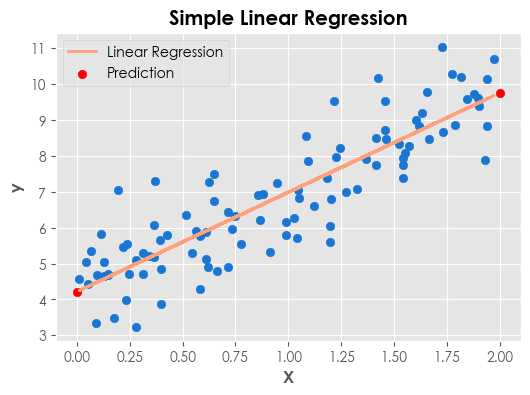

In [10]:
# Linear regression solution for given datapoints
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='#1976D2')
plt.plot(X, y_prediccion, color='#FFA07A', label='Linear Regression', linewidth=2)
plt.scatter(x_predic, y_predic, color='red', label='Prediction')
plt.title('Simple Linear Regression', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.legend()
plt.show()

## <a id='matrixRegression' href="#intro">2. Linear Regression: Matrix form</a>

We can do something similar if instead we use the matrix form $\hat{y} = \theta X + e$. In this case, we can get the coefficients by computing:

### $\theta = X^T y(X^T X)^{-1}$

In this equation $\theta$ is the coefficients vector that minimize the cost function.

In [11]:
# First, add the bias column to X matrix (column filled with 1)
X_b = np.c_[np.ones((n, 1)), X]
theta_best = np.linalg.inv((X_b.T.dot(X_b))).dot(X_b.T).dot(y)

In [12]:
# Our coefficients for theta_0, theta_1 .... etc
print(f'Coefficients: theta_0: {theta_best[0][0]:.3f}, theta_1: {theta_best[1][0]:.3f}')

Coefficients: theta_0: 4.215, theta_1: 2.770


In [13]:
# Lets make couple of predictions for x=0 y x=2
X_new = np.array([[0], [2]])
X_predictors = np.c_[np.ones((2, 1)), X_new]
y_prediccion = X_predictors.dot(theta_best)
y_prediccion

array([[4.21509616],
       [9.75532293]])

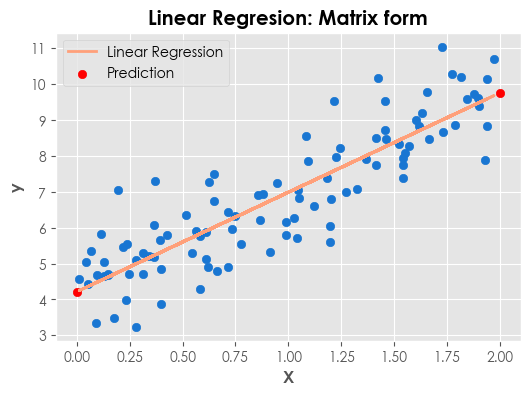

In [14]:
# Visualize linear regression model
plt.figure(figsize=(6, 4))
plt.plot(X, (X_b.dot(theta_best)), color='#FFA07A', label='Linear Regression', linewidth=2)
plt.scatter(X, y, color='#1976D2')
plt.scatter(X_new, y_prediccion, color='red', label='Prediction')
plt.title('Linear Regresion: Matrix form', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.legend()
plt.show()

## <a id='gradientDescent' href="#intro">3. Gradient Descent</a>

It´s also possible to reduce the loss function by implementing an iterative method. Gradient Descent is one of the optimization algorithms that optimize the cost function to reach the optimal minimal solution. We need to compute the following equations until the algorithm converges, in other words, when the error is minimum.

### $\nabla MSE({\theta}) = \frac{2}{n} X^T (X \theta - y)$

### $\theta^{next step} = \theta^{current} - n\nabla MSE({\theta})$

In [15]:
learning_rate = 0.4 # n in the equation above
epochs = 50 # Max number of iterations

# Initialize randomly coefficients
theta_gd = np.random.rand(2, 1)

cost_history = []

for iteration in range(epochs):
    gradients = 2/n * X_b.T.dot(X_b.dot(theta_gd) - y)
    theta_gd = theta_gd - learning_rate * gradients

    # Calcular la función de coste y almacenarla en la lista
    cost = np.mean((X_b.dot(theta_gd) - y)**2)
    cost_history.append(cost)

# Print the coefficients
print('Coefficients:', theta_gd)

Coefficients: [[4.21455552]
 [2.77059074]]


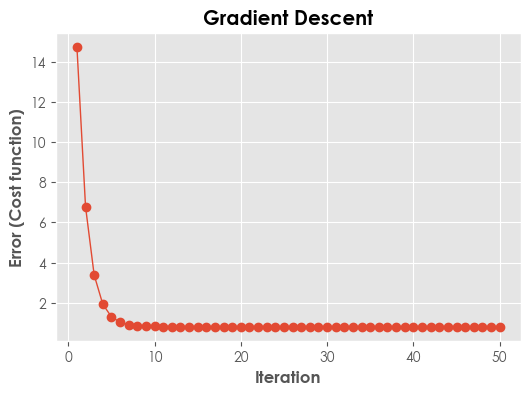

In [16]:
# Visualize the error descendent along the iterations
plt.figure(figsize=(6, 4))
plt.plot(range(1, epochs + 1), cost_history, marker='o', linewidth=1)
plt.title('Gradient Descent', fontweight='bold')
plt.xlabel('Iteration', fontweight='bold')
plt.ylabel('Error (Cost function)', fontweight='bold')
plt.show()

## <a id='scikitLearn' href="#intro">4. Linear Regression: Scikit Learn</a>

Finally, we will use the library sckit learn to perform the linear regression algorithm.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model with training sets
model.fit(X_train, y_train)

# Make new predictions using the training set
y_pred = model.predict(X_test)

# Get the errors to evaluate model accuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Coefficients: {model.intercept_, model.coef_}')
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Coefficients: (array([4.11790056]), array([[2.76668949]]))
RMSE: 0.7943
R²: 0.8410


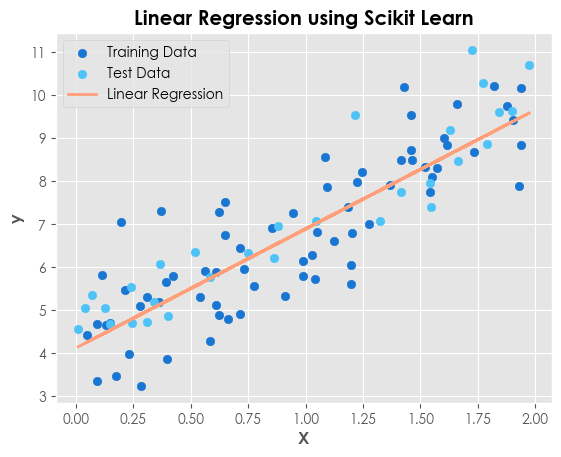

In [19]:
# Visualizar el modelo con los datos de entrenamiento y validación
plt.scatter(X_train, y_train, color='#1976D2', label='Training Data')
plt.scatter(X_test, y_test, color='#4FC3F7', label='Test Data')
plt.plot(X_test, y_pred, color='#FFA07A', label='Linear Regression', linewidth=2)
plt.title('Linear Regression using Scikit Learn', fontweight='bold')
plt.xlabel('X', fontweight='bold')
plt.ylabel('y', fontweight='bold')
plt.legend()
plt.show()